In [66]:
import sys
sys.version

'3.8.3 (default, Jul  2 2020, 16:21:59) \n[GCC 7.3.0]'

In [21]:
import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as srn
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

In [24]:
ds_mycars = pd.read_csv('/home/piai/Downloads/data_stats/mycars.csv')

In [34]:
ds_mycars.head()

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


In [43]:
ds_mycars[['highway_mileage','mpg','automatic']].groupby('automatic').describe()

highway_mileage                                                     \
                    count       mean       std   min   25%   50%   75%   max   
automatic                                                                      
auto                157.0  22.292994  5.623054  12.0  17.0  22.0  26.0  41.0   
manual               77.0  25.779221  5.961772  12.0  23.0  26.0  29.0  44.0   

             mpg                                                    
           count       mean       std  min   25%   50%   75%   max  
automatic                                                           
auto       157.0  15.968153  3.848777  9.0  13.0  16.0  18.0  29.0  
manual      77.0  18.675325  4.488118  9.0  15.0  18.0  21.0  35.0

In [59]:
df = pd.read_csv('/home/piai/Downloads/data_stats/EXH_QC1.csv')

In [60]:
df.head()

,Flaws,Period,Strength,Baking Time,Cabbage weight
0,Scratch,Day,37.6,0.798922,3.6
1,Scratch,Day,38.6,0.849020,2.9
2,Peel,Day,37.2,0.816163,2.8
3,Peel,Day,36.4,0.758266,2.6
4,Smudge,Day,38.6,0.815894,3.4


In [49]:
df1 = df[['Flaws','Period']]

In [50]:
count = df['Flaws'].value_counts().sort_index()

In [51]:
count

Other       6
Peel       15
Scratch    13
Smudge      6
Name: Flaws, dtype: int64

In [52]:
np.cumsum(count)

Other       6
Peel       21
Scratch    34
Smudge     40
Name: Flaws, dtype: int64

In [53]:
percent = count / sum(count) * 100

In [54]:
percent

Other      15.0
Peel       37.5
Scratch    32.5
Smudge     15.0
Name: Flaws, dtype: float64

In [55]:
cumpct = np.cumsum(percent)

In [56]:
cumpct

Other       15.0
Peel        52.5
Scratch     85.0
Smudge     100.0
Name: Flaws, dtype: float64

In [62]:
mu = 115
sigma = 20
x = 135
prob = stats.norm.cdf(x, mu, sigma)
print('{0}분 이상 걸리는 A/S 작업 비율: {1:.1f}%'.format(x,(1-prob)*100))

135분 이상 걸리는 A/S 작업 비율: 15.9%


In [68]:
t = 1.53
df = 5
prob = stats.t.cdf(t,df)
print('P(T<=F): {:.3f}'.format(prob))

P(T<=F): 0.907


In [72]:
def t_dist(df, t=1.53):
    prob = stats.t.cdf(t,df)
    print('P(T<=F): {:.3f}'.format(prob))
    return prob

In [77]:
t_dist(10,t) # 자유도를 10으로 하니 값이 커졌다.
# 표본의 크기가 커져서 꼬리부분이 평평해진다(가운데 부분이 높아진다.)

P(T<=F): 0.921


0.9214931495082925

In [78]:
t_dist(100, t=2.0)

P(T<=F): 0.976


0.9758939106344332

In [107]:
def chi_graph(degree_freedom, size=1000 ,kde = True):
    chi_df = np.random.chisquare(df=degree_freedom, size=size)
    sns.distplot(chi_df, fit = stats.norm, kde = True)

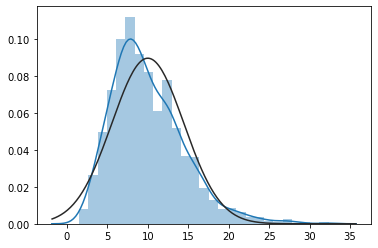

In [109]:
chi_graph(10)

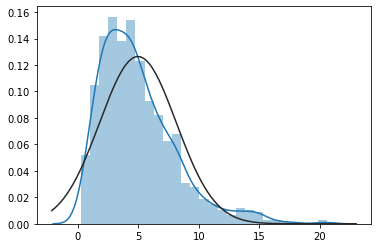

In [110]:
chi_graph(5)

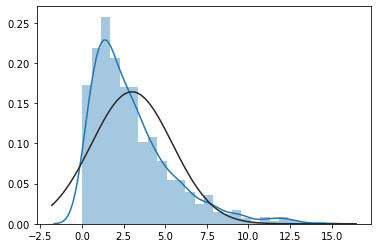

In [111]:
chi_graph(degree_freedom = 3, size = 1000)

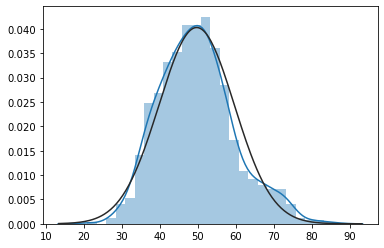

In [112]:
chi_graph(degree_freedom = 50, size = 1000)

In [114]:
chisq = 10
df = 30
prob = stats.chi2.cdf(chisq, df)
print("P(X<={0}):{1:.4f}".format(chisq,prob))

P(X<=10):0.0002


In [115]:
chisq = 3
df = 8
prob = stats.chi2.cdf(chisq, df)
print("P(X<={0}):{1:.4f}".format(chisq,prob))

P(X<=3):0.0656
